In [ ]:
!sudo yum -y install cmake
!sudo pip3 install face_recognition

## Import

Reconnaissance des visages avec face_recognition

In [1]:
from PIL import Image
import face_recognition

from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

In [2]:
fconstantin_image = face_recognition.load_image_file("data/fconstantin.jpg")
fconstantin_face_encoding = face_recognition.face_encodings(fconstantin_image)[0]

known_faces = [
    fconstantin_face_encoding
]

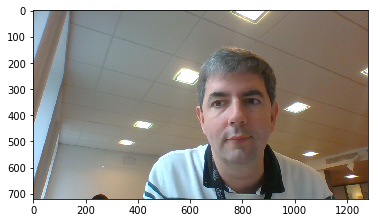

In [3]:
imshow(np.asarray(fconstantin_image))

In [4]:
unknown_image = face_recognition.load_image_file("data/20181107_152310.jpg")

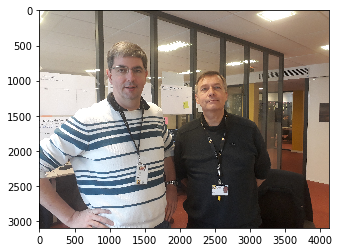

In [5]:
imshow(np.asarray(unknown_image))

In [6]:
face_locations = face_recognition.face_locations(unknown_image)

In [7]:
print("I found {} face(s) in this photograph.".format(len(face_locations)))

I found 3 face(s) in this photograph.


A face is located at pixel location Top: 726, Left: 1034, Bottom: 1281, Right: 1589
Is the unknown face a picture of fconstantin? True
A face is located at pixel location Top: 1018, Left: 2258, Bottom: 1403, Right: 2643
Is the unknown face a picture of fconstantin? False
A face is located at pixel location Top: 2520, Left: 2629, Bottom: 2572, Right: 2681


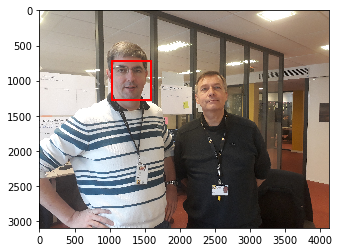

In [13]:
fig,ax = plt.subplots(1)
ax.imshow(unknown_image)

for face_location in face_locations:

    # Print the location of each face in this image
    top, right, bottom, left = face_location
    print("A face is located at pixel location Top: {}, Left: {}, Bottom: {}, Right: {}".format(top, left, bottom, right))

    # You can access the actual face itself like this:
    face_image = unknown_image[top:bottom, left:right]
    pil_image = Image.fromarray(face_image)
    
    
    faces_encoding = face_recognition.face_encodings(face_image)
    
    if len(faces_encoding) > 0:
        unknown_face_encoding = faces_encoding[0]

        results = face_recognition.compare_faces(known_faces, unknown_face_encoding)

        print("Is the unknown face a picture of fconstantin? {}".format(results[0]))

        if results[0]:
            rect = patches.Rectangle((left,top),right - left,bottom - top,linewidth=2,edgecolor='r',facecolor='none')
            ax.add_patch(rect)
    #else:
#        imshow(np.asarray(pil_image))
            
plt.show() 